In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from functools import reduce
# import umap


In [ ]:
def add_kmer_cnt(seq, K):
    tmp = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), 0)
    for i in range(len(seq) - K + 1):
        tmp[seq[i:i+K]] += 1
    return tmp

def get_sorted_kmer_dict_hl_(inputFile, K):
    d = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), np.array([]))
    # ctrl_cnt = 0
    with open(inputFile, 'r') as inp:
        for line in inp:
            line = inp.readline()
            tmp = add_kmer_cnt(line.strip(), K)
            for k in tmp.keys():
                d[k] = np.append(d[k], tmp[k])
            # ctrl_cnt = ctrl_cnt + 1
            # if ctrl_cnt == 1000:
            #     break
    # d = sorted(d.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

    return dict(d)
    
def getGC(inputFile):
    Aarr = np.array([])
    Tarr = np.array([])
    Garr = np.array([])
    Carr = np.array([])
    with open(inputFile, 'r') as inp:
        for line in inp:
            seq = line.strip()
            Aarr = np.append(Aarr, seq.count('A'))
            Tarr = np.append(Tarr, seq.count('T'))
            Garr = np.append(Garr, seq.count('G'))
            Carr = np.append(Carr, seq.count('C'))
    return np.array([Aarr,Tarr,Garr,Carr]) 
    
def getGC_dbl_lines(inputFile):
    Aarr = np.array([])
    Tarr = np.array([])
    Garr = np.array([])
    Carr = np.array([])
    with open(inputFile, 'r') as inp:
        for line in inp:
            seq = inp.readline().strip()
            Aarr = np.append(Aarr, seq.count('A'))
            Tarr = np.append(Tarr, seq.count('T'))
            Garr = np.append(Garr, seq.count('G'))
            Carr = np.append(Carr, seq.count('C'))
    return np.array([Aarr,Tarr,Garr,Carr]) 

def kmer_cnt(seq, K, d):
    for i in range(len(seq) - K + 1):
        d[seq[i:i+K]] += 1
    return d

def get_sorted_kmer_dict(inputFile, K):
    d = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), 0)
    with open(inputFile, 'r') as inp:
        for line in inp:
            line = inp.readline().strip()
            d = kmer_cnt(line, K, d)
    d = sorted(d.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
    return d

In [24]:
fnm_Pos = ['/home/mleone2/ml_class_project/results/fold' + str(i) + '_testPos_1000result.txt' for i in range(1, 6)]
fnm_Neg10x = ['/home/mleone2/ml_class_project/results/fold' + str(i) + '_testNeg10x_1000result.txt' for i in range(1, 6)]
fnm_random = ['/home/mleone2/ml_class_project/results/random_seqs_test' + str(i) + '_predictions_10000result.txt' for i in range(1, 6)]

In [25]:
arr_Pos = np.array([])
arr_Neg10x = np.array([])
arr_random = np.array([])
for fnm in fnm_Pos:
    with open(fnm, 'r') as inp:
        for line in inp:
            arr_Pos = np.append(arr_Pos, float(line.strip()))
for fnm in fnm_Neg10x:
    with open(fnm, 'r') as inp:
        for line in inp:
            arr_Neg10x = np.append(arr_Neg10x, float(line.strip()))
for fnm in fnm_random:
    with open(fnm, 'r') as inp:
        for line in inp:
            arr_random = np.append(arr_random, float(line.strip()))

Text(0, 0.5, 'frequency(%)')

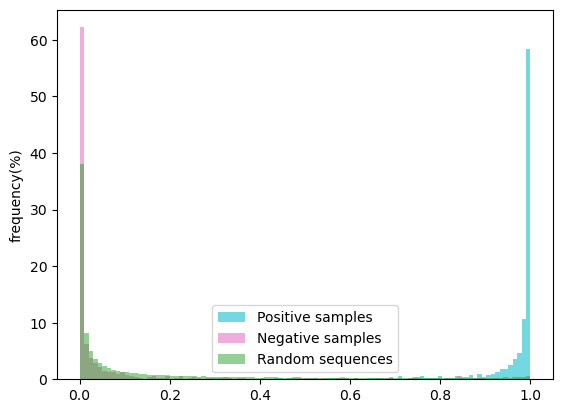

In [26]:
plt.hist(arr_Pos, bins=100, weights=np.zeros_like(arr_Pos) + 100 / len(arr_Pos), label = 'Positive samples', alpha = 0.6, color = 'tab:cyan');
plt.hist(arr_Neg10x, bins=100, weights=np.zeros_like(arr_Neg10x) + 100 / len(arr_Neg10x), label = 'Negative samples', alpha = 0.6, color = 'tab:pink');
plt.hist(arr_random, bins=100, weights=np.zeros_like(arr_random) + 100 / len(arr_random), label = 'Random sequences', alpha = 0.5, color = 'tab:green');
plt.legend()
plt.ylabel('frequency(%)')

In [27]:
len(np.where(arr_random>0.98)[0])

477

In [28]:
len(np.where(arr_random<0.00001)[0])

672

In [26]:
# head -2000 /home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_testPos.fa  | awk 'NR%2==0' > Pos_score.txt

high_seq = '/home/mleone2/ml_class_project/results/high_score.txt'
low_seq = '/home/mleone2/ml_class_project/results/low_score.txt'

In [2]:
# def getGC_dbl_lines(inputFile):
#     Aarr = np.array([])
#     Tarr = np.array([])
#     Garr = np.array([])
#     Carr = np.array([])
#     with open(inputFile, 'r') as inp:
#         for line in inp:
#             seq = inp.readline().strip()
#             Aarr = np.append(Aarr, seq.count('A'))
#             Tarr = np.append(Tarr, seq.count('T'))
#             Garr = np.append(Garr, seq.count('G'))
#             Carr = np.append(Carr, seq.count('C'))
#     return np.array([Aarr,Tarr,Garr,Carr]) 

ATGC_pos = getGC_dbl_lines('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_validPos.fa')
ATGC_pos = ATGC_pos/np.sum(ATGC_pos, axis =0)
ATGC_neg = getGC_dbl_lines('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_validNeg10x.fa')
ATGC_neg = ATGC_neg/np.sum(ATGC_neg, axis =0)
GCpos = ATGC_pos[2]+ATGC_pos[3]
GCneg = ATGC_neg[2]+ATGC_neg[3]

Text(0, 0.5, 'frequency(%)')

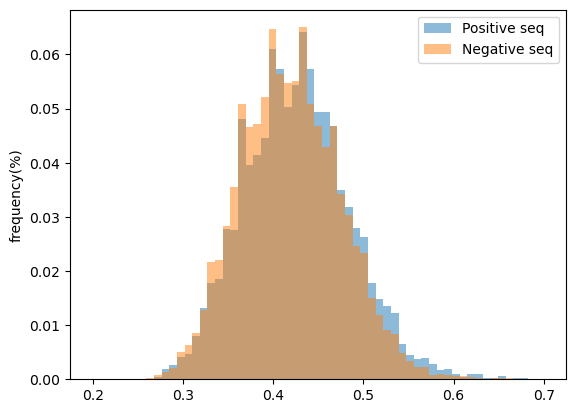

In [33]:
plt.hist(GCpos, weights=np.ones_like(GCpos) / len(GCpos), alpha = 0.5, label='Positive seq', bins=np.linspace(0.2, 0.7, num = 60))
plt.hist(GCneg, weights=np.ones_like(GCneg) / len(GCneg), alpha = 0.5, label='Negative seq', bins=np.linspace(0.2, 0.7, num = 60))
plt.legend();
plt.ylabel('frequency(%)')

In [3]:
stats.ttest_ind(GCpos, GCneg, equal_var = True, alternative = 'greater')

In [21]:
# ATGC_pos = getGC(pos_seq)
# ATGC_pos = ATGC_pos/np.sum(ATGC_pos, axis =0)
# ATGC_neg = getGC(neg_seq)
# ATGC_neg = ATGC_neg/np.sum(ATGC_neg, axis =0)
# GCpos = ATGC_pos[2]+ATGC_pos[3]
# GCneg = ATGC_neg[2]+ATGC_neg[3]
# plt.hist(GCpos, weights=np.zeros_like(GCpos) + 100 / len(GCpos), alpha = 0.5, label='Positive seq', bins=30)
# plt.hist(GCneg, weights=np.zeros_like(GCneg) + 100 / len(GCneg), alpha = 0.5, label='Negative seq', bins=30)
# plt.legend();
# plt.ylabel('frequency(%)')

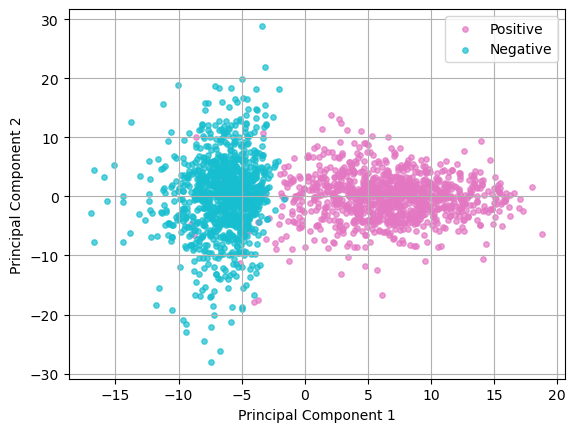

In [9]:

K = 5
# def add_kmer_cnt(seq, K):
#     tmp = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), 0)
#     for i in range(len(seq) - K + 1):
#         tmp[seq[i:i+K]] += 1
#     return tmp

def get_sorted_kmer_dict_hl_(inputFile, K):
    d = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), np.array([]))
    # ctrl_cnt = 0
    with open(inputFile, 'r') as inp:
        for line in inp:
            line = inp.readline()
            tmp = add_kmer_cnt(line.strip(), K)
            for k in tmp.keys():
                d[k] = np.append(d[k], tmp[k])
            # ctrl_cnt = ctrl_cnt + 1
            # if ctrl_cnt == 1000:
                # break
    # d = sorted(d.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

    return dict(d)
# cat /home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_validPos.fa | awk 'NR%2==0' | shuf -n 1000 -o /home/mleone2/ml_class_project/results/Mo2015_EXCpos_Ctx_fold1_validPos_shuf1000.fa
# cat /home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_validNeg10x.fa | awk 'NR%2==0' | shuf -n 1000 -o /home/mleone2/ml_class_project/results/Mo2015_EXCpos_Ctx_fold1_validNeg10x_shuf1000.fa
pos_seq = '/home/mleone2/ml_class_project/results/Mo2015_EXCpos_Ctx_fold1_validPos_shuf1000.fa'
neg_seq = '/home/mleone2/ml_class_project/results/Mo2015_EXCpos_Ctx_fold1_validNeg10x_shuf1000.fa'
dp = get_sorted_kmer_dict_hl_(pos_seq, K)
dn = get_sorted_kmer_dict_hl_(neg_seq, K)

dfp = pd.DataFrame.from_dict(dp)
dfp.insert(0, 'class', 'Positive')
# dfh.head()

dfn = pd.DataFrame.from_dict(dn)
dfn.insert(0, 'class', 'Negative')
# dfh.head()
df = pd.concat([dfp, dfn])
df = df.reset_index(drop=True)
# df

pca = PCA(n_components=2)
x = df.drop(['class'], axis=1)
y = df.iloc[[0]]
principalComponents = pca.fit_transform(x)
x = StandardScaler().fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_title('2 component PCA', fontsize = 20)
targets = ['Positive', 'Negative']
colors = ['tab:pink', 'tab:cyan']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15, alpha=0.7)
ax.legend(targets)
ax.grid()

In [11]:
orig_seqs = get_sorted_kmer_dict_hl("/home/mleone2/ml_class_project/results/satmut_orig_seqs_as_strings.txt", K)
mut_seqs =  get_sorted_kmer_dict_hl("/home/mleone2/ml_class_project/results/satmut_seqs_as_strings.txt", K)
len(orig_seqs['AAAAA'])

200

In [13]:
dfo = pd.DataFrame.from_dict(orig_seqs)
dfo.insert(0, 'class', 'Before mutation')
# dfh.head()

dfm = pd.DataFrame.from_dict(mut_seqs)
dfm.insert(0, 'class', 'After mutation')
# dfh.head()

dfnew = pd.concat([dfp, dfn, dfo, dfm])
dfnew = dfnew.reset_index(drop=True)

# df
newx = dfnew.drop(['class'], axis=1)
newy = dfnew.iloc[[0]]

principalComponents_new = pca.transform(newx)
principalDf_new = pd.DataFrame(data = principalComponents_new
             , columns = ['principal component 1', 'principal component 2'])
principalDf_new
finalDf_new = pd.concat([principalDf_new, dfnew[['class']]], axis = 1)

In [14]:
finalDf_new

,principal component 1,principal component 2,class
0,3.802673,-6.222871,Positive
1,6.667808,-3.015337,Positive
2,4.142391,-0.360845,Positive
3,10.316489,-1.084284,Positive
4,7.505183,-1.789912,Positive
...,...,...,...
2395,3.627599,-0.100800,After mutation
2396,4.623511,-2.563868,After mutation
2397,0.876350,-0.357105,After mutation
2398,6.110301,3.464852,After mutation


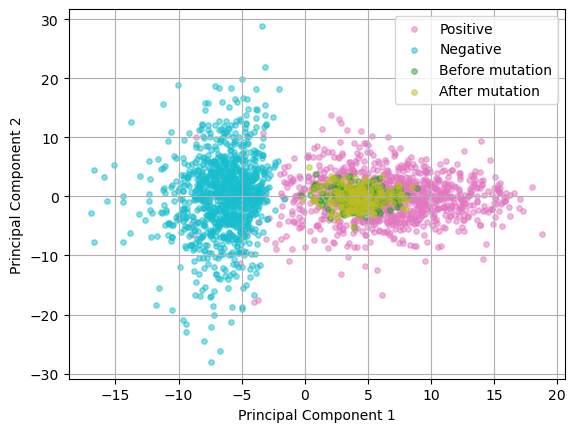

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_title('2 component PCA', fontsize = 20)
targets = ['Positive', 'Negative', 'Before mutation', 'After mutation']
colors = ['tab:pink', 'tab:cyan', 'tab:green', 'tab:olive']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_new['class'] == target
    ax.scatter(finalDf_new.loc[indicesToKeep, 'principal component 1']
               , finalDf_new.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15, alpha=0.5)
ax.legend(targets)
ax.grid()

In [5]:
def getGC(inputFile):
    Aarr = np.array([])
    Tarr = np.array([])
    Garr = np.array([])
    Carr = np.array([])
    with open(inputFile, 'r') as inp:
        for line in inp:
            seq = line.strip()
            Aarr = np.append(Aarr, seq.count('A'))
            Tarr = np.append(Tarr, seq.count('T'))
            Garr = np.append(Garr, seq.count('G'))
            Carr = np.append(Carr, seq.count('C'))
    return np.array([Aarr,Tarr,Garr,Carr]) 
ATGC_high = getGC(high_seq)
ATGC_high = ATGC_high/np.sum(ATGC_high, axis =0)
ATGC_low = getGC(low_seq)
ATGC_low = ATGC_low/np.sum(ATGC_low, axis =0)
GChigh = ATGC_high[2]+ATGC_high[3]
GClow = ATGC_low[2]+ATGC_low[3]
plt.hist(GChigh, weights=np.zeros_like(GChigh) + 100 / len(GChigh), alpha = 0.5, label='high score seq', bins=np.linspace(0.3, 0.55, num = 60))
plt.hist(GClow, weights=np.zeros_like(GClow) + 100 / len(GClow), alpha = 0.5, label='low score seq', bins=np.linspace(0.3, 0.55, num = 60))
plt.legend();
plt.ylabel('frequency(%)')

In [31]:
stats.ttest_ind(GChigh, GClow, equal_var = True, alternative = 'greater')

Ttest_indResult(statistic=8.213091458054109, pvalue=2.880118222934251e-16)

In [32]:
stats.ttest_1samp(GChigh, popmean = 0.4268)

Ttest_1sampResult(statistic=2.623163830755086, pvalue=0.00899125263583053)

In [33]:
stats.ttest_1samp(GClow, popmean = 0.4268)

Ttest_1sampResult(statistic=-9.623556762816742, pvalue=1.2688208606854187e-20)

In [34]:
print(np.mean(GChigh))
print(np.std(GChigh))
print(np.mean(GClow))
print(np.std(GClow))

0.42943881628775993
0.021947609119250828
0.4186062399011501
0.022055092934543562


In [35]:
(0.42943881628775993 - 0.4186062399011501) / np.sqrt(((0.021947609119250828 ** 2)/477) + ((0.022055092934543562 ** 2)/672))

8.2270670547256

In [27]:
K = 5
# def add_kmer_cnt(seq, K):
#     tmp = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), 0)
#     for i in range(len(seq) - K + 1):
#         tmp[seq[i:i+K]] += 1
#     return tmp

def get_sorted_kmer_dict_hl(inputFile, K):
    d = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), np.array([]))
    with open(inputFile, 'r') as inp:
        for line in inp:
            tmp = add_kmer_cnt(line.strip(), K)
            for k in tmp.keys():
                d[k] = np.append(d[k], tmp[k])
    # d = sorted(d.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

    return dict(d)

dh = get_sorted_kmer_dict_hl(high_seq, K)
dl = get_sorted_kmer_dict_hl(low_seq, K)

In [28]:
dfh = pd.DataFrame.from_dict(dh)
dfh.insert(0, 'class', 'highScore')
# dfh.head()

In [29]:
dfl = pd.DataFrame.from_dict(dl)
dfl.insert(0, 'class', 'lowScore')
# dfl.head()

In [30]:
df = pd.concat([dfh, dfl])
df = df.reset_index(drop=True)
# df

In [31]:
pca = PCA(n_components=2)
x = df.drop(['class'], axis=1)
y = df.iloc[[0]]
principalComponents = pca.fit_transform(x)
x = StandardScaler().fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)

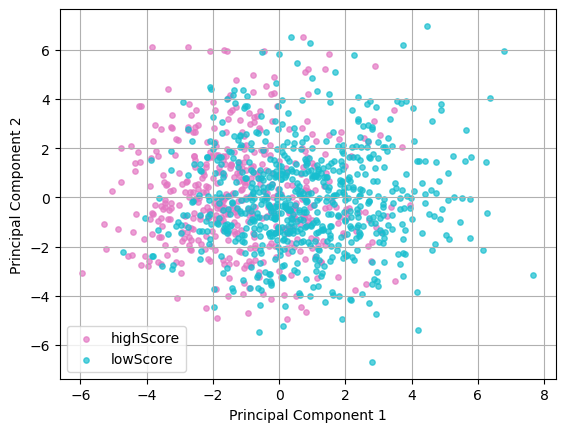

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_title('2 component PCA', fontsize = 20)
targets = ['highScore', 'lowScore']
colors = ['tab:pink', 'tab:cyan']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15, alpha=0.7)
ax.legend(targets)
ax.grid()

In [33]:
dfnew_ = pd.concat([dfh, dfl, dfo, dfm])
dfnew_ = dfnew_.reset_index(drop=True)

# df
newx_ = dfnew_.drop(['class'], axis=1)
newy_ = dfnew_.iloc[[0]]

principalComponents_new_ = pca.transform(newx_)
principalDf_new_ = pd.DataFrame(data = principalComponents_new_
             , columns = ['principal component 1', 'principal component 2'])
principalDf_new_
finalDf_new_ = pd.concat([principalDf_new_, dfnew_[['class']]], axis = 1)

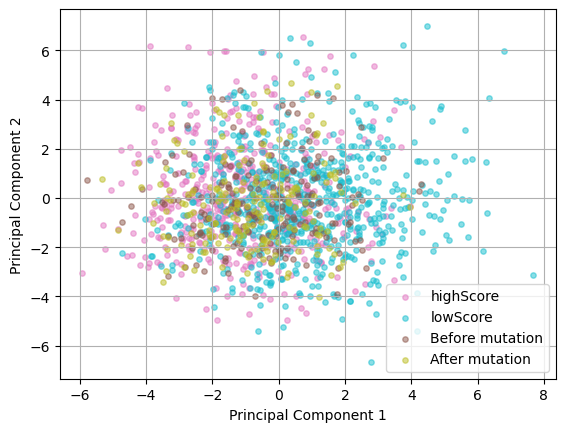

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_title('2 component PCA', fontsize = 20)
targets = ['highScore', 'lowScore', 'Before mutation', 'After mutation']
colors = ['tab:pink', 'tab:cyan', 'tab:brown', 'tab:olive']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_new_['class'] == target
    ax.scatter(finalDf_new_.loc[indicesToKeep, 'principal component 1']
               , finalDf_new_.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15, alpha=0.5)
ax.legend(targets)
ax.grid()

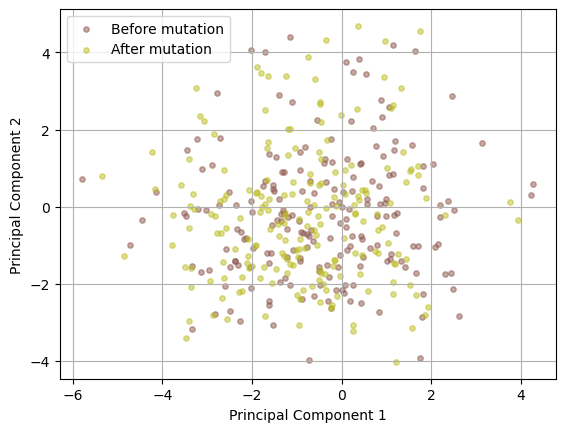

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_title('2 component PCA', fontsize = 20)
targets = ['Before mutation', 'After mutation']
colors = ['tab:brown', 'tab:olive']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_new_['class'] == target
    ax.scatter(finalDf_new_.loc[indicesToKeep, 'principal component 1']
               , finalDf_new_.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15, alpha=0.5)
ax.legend(targets)
ax.grid()

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(x)
embedding.shape

(1149, 2)

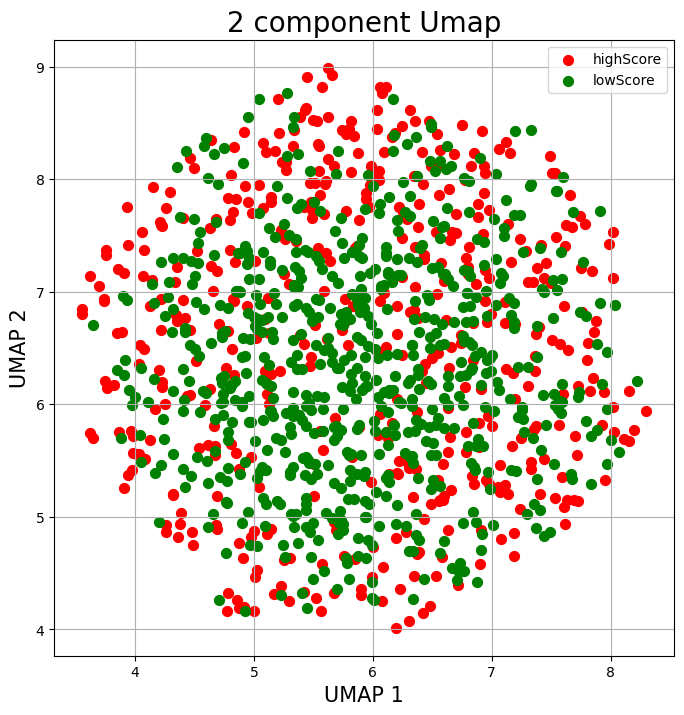

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('UMAP 1', fontsize = 15)
ax.set_ylabel('UMAP 2', fontsize = 15)
ax.set_title('2 component Umap', fontsize = 20)
targets = ['highScore', 'lowScore']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(embedding[indicesToKeep, 0]
               ,embedding[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
K = 5
def kmer_cnt(seq, K, d):
    for i in range(len(seq) - K + 1):
        d[seq[i:i+K]] += 1
    return d

# def get_sorted_kmer_dict(inputFile, K):
#     d = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), 0)
#     with open(inputFile, 'r') as inp:
#         for line in inp:
#             d = kmer_cnt(line.strip(), K, d)
#     d = sorted(d.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
#     return d

print(get_sorted_kmer_dict(high_seq, K)[:10])
print(get_sorted_kmer_dict(high_seq, K)[-10:])
print(get_sorted_kmer_dict(low_seq, K)[:10])
print(get_sorted_kmer_dict(low_seq, K)[-10:])

[('TTTTT', 545), ('AAAAT', 520), ('AAATA', 515), ('AAAAA', 512), ('ATTTT', 510), ('TAAAT', 507), ('AATTT', 500), ('TTATA', 499), ('TATTT', 499), ('TAAAA', 496)]
[('CGACC', 98), ('CCCCC', 97), ('GACCC', 96), ('GGGGC', 92), ('GGCCC', 91), ('GGGCC', 90), ('GGCCG', 90), ('GCCCC', 87), ('CCCGG', 87), ('CGGCC', 77)]
[('TAATA', 927), ('TTAAT', 919), ('ATTAA', 901), ('TATTA', 883), ('TTATT', 855), ('AATAA', 845), ('AATTA', 809), ('ATAAT', 793), ('TAATT', 792), ('ATTAT', 778)]
[('CCCGC', 124), ('GGGCG', 120), ('CGCCC', 120), ('CGGGC', 116), ('CGCGC', 115), ('CGGCG', 114), ('GCGGC', 107), ('GGCGC', 106), ('CCGCG', 103), ('CGCGG', 93)]


In [13]:
sum(get_sorted_kmer_dict(high_seq, K).values())/477

497.0

In [ ]:
sum(get_sorted_kmer_dict(low_seq, K).values())/672

In [1]:
K = 5
def kmer_cnt(seq, K, d):
    for i in range(len(seq) - K + 1):
        d[seq[i:i+K]] += 1
    return d

def get_sorted_kmer_dict(inputFile, K):
    d = dict.fromkeys(reduce(lambda x,y: [i+j for i in x for j in y], [['A','T','C','G']] * K), 0)
    with open(inputFile, 'r') as inp:
        for line in inp:
            line = inp.readline().strip()
            d = kmer_cnt(line, K, d)
    d = sorted(d.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
    return d
get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_testPos.fa', 5)[:10]

[('TTTTT', 27699),
 ('AAAAA', 27469),
 ('TTTCT', 20380),
 ('AGAAA', 20219),
 ('ATTTT', 19020),
 ('AAAAT', 18823),
 ('TGTGT', 18141),
 ('AGAGA', 17913),
 ('ACACA', 17871),
 ('TCTCT', 17824)]

In [7]:
get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_validPos.fa', 5)

[('AAAAA', 17786),
 ('TTTTT', 17474),
 ('TTTCT', 12900),
 ('AGAAA', 12799),
 ('ACACA', 12205),
 ('AAAAT', 12169),
 ('TGTGT', 12136),
 ('ATTTT', 12066),
 ('TCTCT', 11388),
 ('AGAGA', 10881),
 ('TTCTT', 10376),
 ('TAAAA', 10309),
 ('AAGAA', 10308),
 ('CACAC', 10291),
 ('TTTTA', 10256),
 ('GAAAA', 10094),
 ('GTGTG', 10078),
 ('TATTT', 9984),
 ('AAATA', 9959),
 ('TTTTC', 9920),
 ('TCTTT', 9894),
 ('AAAGA', 9805),
 ('TGTTT', 9671),
 ('AAACA', 9449),
 ('CATTT', 9308),
 ('TTAAA', 9214),
 ('AAATG', 9184),
 ('TTTAA', 9121),
 ('TTCCT', 9119),
 ('CAGAA', 8950),
 ('TTCTG', 8914),
 ('AGGAA', 8908),
 ('CTCTC', 8739),
 ('CTTTT', 8730),
 ('AAAAG', 8706),
 ('TTTAT', 8698),
 ('CAGAG', 8559),
 ('TCTGT', 8491),
 ('CTCTG', 8435),
 ('ACAGA', 8425),
 ('TGAAA', 8413),
 ('ATAAA', 8334),
 ('CTTCT', 8292),
 ('TTTCA', 8267),
 ('CTGTG', 8188),
 ('TTTGT', 8184),
 ('GGAAA', 8173),
 ('GAGAG', 8168),
 ('AATTT', 8156),
 ('AAATT', 8120),
 ('ACAAA', 8072),
 ('AGAAG', 8048),
 ('TTTCC', 8041),
 ('CACAG', 8030),
 ('TTTTG', 

In [8]:

get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold2_testPos.fa', 5)[:10]

[('TTTTT', 27699),
 ('AAAAA', 27469),
 ('TTTCT', 20380),
 ('AGAAA', 20219),
 ('ATTTT', 19020),
 ('AAAAT', 18823),
 ('TGTGT', 18141),
 ('AGAGA', 17913),
 ('ACACA', 17871),
 ('TCTCT', 17824)]

In [9]:
get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold2_validPos.fa', 5)[:10]

[('AAAAA', 18114),
 ('TTTTT', 17712),
 ('TTTCT', 13361),
 ('AGAAA', 13201),
 ('TGTGT', 12561),
 ('ATTTT', 12465),
 ('AAAAT', 12396),
 ('ACACA', 11839),
 ('TCTCT', 11528),
 ('AGAGA', 11218)]

In [10]:
# negative
get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold2_testNeg10x.fa', 5)[:10]

[('AAAAA', 208220),
 ('TTTTT', 206575),
 ('ACACA', 171285),
 ('TGTGT', 168144),
 ('AGAAA', 159294),
 ('TTTCT', 157815),
 ('TCTCT', 149928),
 ('AGAGA', 148601),
 ('AAGAA', 142029),
 ('TTCTT', 140352)]

In [11]:
# simulated
get_sorted_kmer_dict('/home/mleone2/ml_class_project/results/random_seqs_test.fa', 5)[:10]

[('AATTA', 97029),
 ('TAATT', 96930),
 ('AAATT', 96863),
 ('TATAT', 96584),
 ('TTAAT', 96547),
 ('TTTAA', 96544),
 ('ATTAT', 96513),
 ('AATTT', 96480),
 ('ATAAT', 96423),
 ('TTTTT', 96401)]

In [14]:
for i in range(5, 8):
    print('k =', i)
    print(get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_testPos.fa', i)[:10])

k = 5
[('TTTTT', 27699), ('AAAAA', 27469), ('TTTCT', 20380), ('AGAAA', 20219), ('ATTTT', 19020), ('AAAAT', 18823), ('TGTGT', 18141), ('AGAGA', 17913), ('ACACA', 17871), ('TCTCT', 17824)]
k = 6
[('TTTTTT', 13444), ('AAAAAA', 13353), ('TGTGTG', 9813), ('CACACA', 9613), ('GTGTGT', 8513), ('ACACAC', 8256), ('AGAGAG', 7288), ('TTTTCT', 7218), ('CTCTCT', 7086), ('AGAAAA', 6955)]
k = 7
[('TTTTTTT', 8680), ('AAAAAAA', 8656), ('TGTGTGT', 6781), ('ACACACA', 6534), ('GTGTGTG', 6405), ('CACACAC', 6150), ('AGAGAGA', 4633), ('TCTCTCT', 4422), ('GAGAGAG', 4170), ('CTCTCTC', 3906)]


In [3]:
for i in range(5, 8):
    print('k =', i)
    print(get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold1_testNeg10x.fa', i)[:10])

k = 5
[('AAAAA', 208220), ('TTTTT', 206575), ('ACACA', 171285), ('TGTGT', 168144), ('AGAAA', 159294), ('TTTCT', 157815), ('TCTCT', 149928), ('AGAGA', 148601), ('AAGAA', 142029), ('TTCTT', 140352)]
k = 6
[('AAAAAA', 96877), ('TTTTTT', 96328), ('CACACA', 94078), ('TGTGTG', 92022), ('ACACAC', 84975), ('GTGTGT', 83040), ('CTCTCT', 60749), ('AGAGAG', 58875), ('TCTCTC', 58600), ('AAGAAA', 58320)]
k = 7
[('ACACACA', 69847), ('TGTGTGT', 67949), ('CACACAC', 64012), ('GTGTGTG', 62518), ('TTTTTTT', 58959), ('AAAAAAA', 58924), ('TCTCTCT', 40479), ('AGAGAGA', 38844), ('CTCTCTC', 36743), ('GAGAGAG', 34663)]


In [3]:
for i in range(5, 8):
    print('k =', i)
    print(get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold2_testNeg10x.fa', i)[:10])

k = 5
[('AAAAA', 208220), ('TTTTT', 206575), ('ACACA', 171285), ('TGTGT', 168144), ('AGAAA', 159294), ('TTTCT', 157815), ('TCTCT', 149928), ('AGAGA', 148601), ('AAGAA', 142029), ('TTCTT', 140352)]
k = 6
[('AAAAAA', 96877), ('TTTTTT', 96328), ('CACACA', 94078), ('TGTGTG', 92022), ('ACACAC', 84975), ('GTGTGT', 83040), ('CTCTCT', 60749), ('AGAGAG', 58875), ('TCTCTC', 58600), ('AAGAAA', 58320)]
k = 7
[('ACACACA', 69847), ('TGTGTGT', 67949), ('CACACAC', 64012), ('GTGTGTG', 62518), ('TTTTTTT', 58959), ('AAAAAAA', 58924), ('TCTCTCT', 40479), ('AGAGAGA', 38844), ('CTCTCTC', 36743), ('GAGAGAG', 34663)]


In [4]:
for i in range(5, 8):
    print('k =', i)
    print(get_sorted_kmer_dict('/home/mleone2/ml_class_project/FASTA_CV/Mo2015_EXCpos_Ctx_fold2_validNeg10x.fa', i)[:10])

k = 5
[('AAAAA', 171753), ('TTTTT', 170369), ('TGTGT', 141085), ('ACACA', 137784), ('TTTCT', 132646), ('AGAAA', 131419), ('TCTCT', 126002), ('AGAGA', 124216), ('AAGAA', 117719), ('TTCTT', 117361)]
k = 6
[('AAAAAA', 79389), ('TTTTTT', 78443), ('TGTGTG', 75885), ('CACACA', 74261), ('GTGTGT', 68458), ('ACACAC', 66920), ('CTCTCT', 50259), ('AGAGAG', 49415), ('TCTCTC', 48229), ('AAAGAA', 48178)]
k = 7
[('TGTGTGT', 55903), ('ACACACA', 54385), ('GTGTGTG', 51304), ('CACACAC', 50059), ('AAAAAAA', 47929), ('TTTTTTT', 47358), ('TCTCTCT', 33023), ('AGAGAGA', 32481), ('CTCTCTC', 29699), ('GAGAGAG', 29244)]
